In [69]:
import tensorflow as tf                          #tensorflow lirary used to train deep learningi model specially NN
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt                  #used to create visualisation 
import pandas as pd                              #pandas used for working with datasets
import seaborn as sns                            #used for creating statistical graph
import numpy as np                               #used for mathematical tasks
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D

from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pip show tensorflow

Name: tensorflow
Version: 2.16.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
import keras
print(keras.__version__)

3.6.0


In [4]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [5]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


## Image Preprocessing

In [7]:
BATCH_SIZE = 32                 #the number of training sample processed together in single iteration
IMAGE_SIZE = 128               #single image size
CHANNELS = 3
EPOCHS = 50

### Keras Image Data Loading

### Training Dataset Loading

In [10]:
# Keras image data loading (train)
training_dataset = tf.keras.utils.image_dataset_from_directory(
    'train',                                                         # add train directory
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
)

Found 70295 files belonging to 38 classes.


### Validation Dataset Loading

In [12]:
# Keras image data loading (valid)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'valid',                                                         # add valid directory
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
)

Found 17572 files belonging to 38 classes.


### Test Dataset Loading

In [14]:
# Keras image data loading (test)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'valid',                                                         # add test directory
)

Found 17572 files belonging to 38 classes.


In [15]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [16]:
validation_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [17]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
# Display the available class names on training dataset
class_names = training_dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [19]:
# Display the available class names on validation dataset
class_names = validation_dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

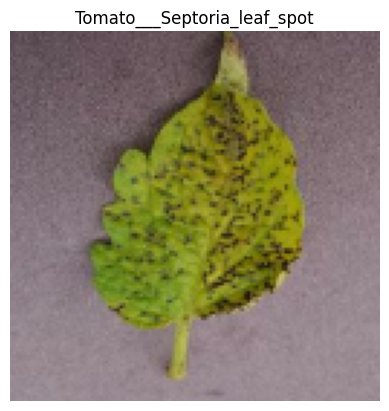

2025-03-09 05:29:16.405310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
# Display the a single images
for image_batch, label_batch in training_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(label_batch[0].numpy())])  # Extract index
    plt.axis("off")
    plt.show()

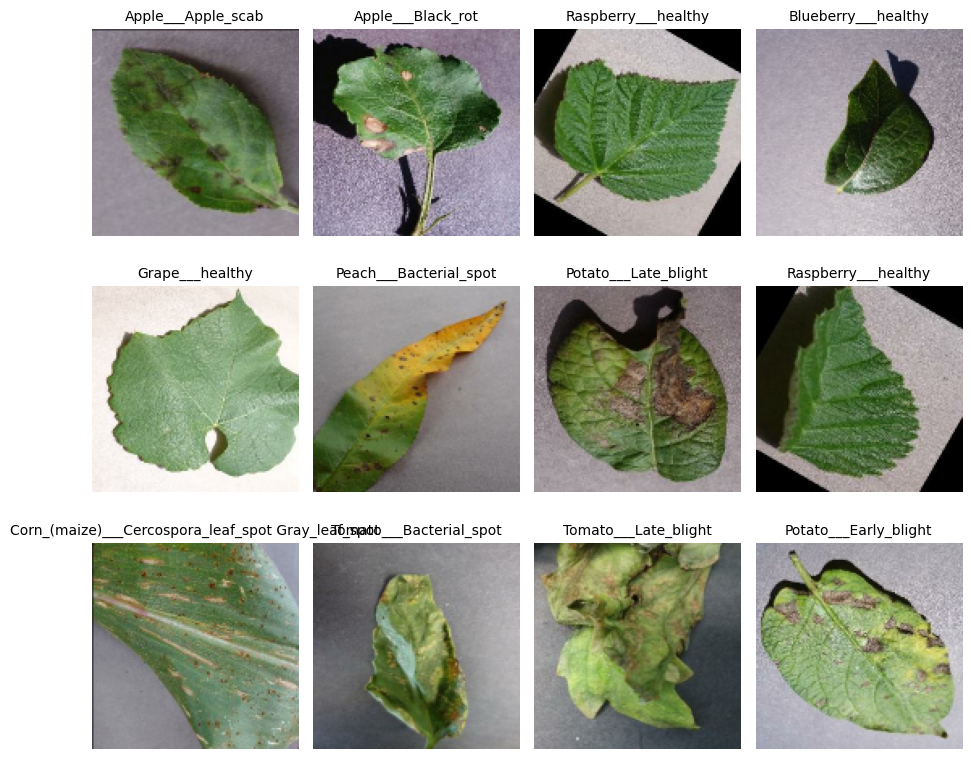

2025-03-09 05:29:17.146123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
for image_batch, label_batch in training_dataset.take(1):  # Take one batch
    plt.figure(figsize=(9, 8))  # Set figure size
    
    for i in range(12):  # Loop over first 12 images
        ax = plt.subplot(3, 4, i + 1)  # Create a subplot (3 rows, 4 columns)
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # Convert tensor to image
        plt.title(class_names[np.argmax(label_batch[i].numpy())], fontsize = 10)  # Get class label
        plt.axis("off")  # Hide the axis ( x and y axis)
    
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show all images at together

In [22]:
# check the shape of the training dataset
for x,y in training_dataset:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[144.5  139.5  136.5 ]
   [144.5  139.5  136.5 ]
   [144.5  139.5  136.5 ]
   ...
   [149.   144.   141.  ]
   [148.   143.   140.  ]
   [147.25 142.25 139.25]]

  [[145.   140.   137.  ]
   [145.   140.   137.  ]
   [145.   140.   137.  ]
   ...
   [149.   144.   141.  ]
   [148.   143.   140.  ]
   [148.   143.   140.  ]]

  [[146.   141.   138.  ]
   [146.   141.   138.  ]
   [146.   141.   138.  ]
   ...
   [148.   143.   140.  ]
   [149.   144.   141.  ]
   [149.   144.   141.  ]]

  ...

  [[103.5   95.5   93.5 ]
   [102.    94.    92.  ]
   [102.5   94.5   92.5 ]
   ...
   [117.25 111.25 113.25]
   [117.25 111.25 113.25]
   [117.75 111.75 113.75]]

  [[107.5   99.5   97.5 ]
   [106.    98.    96.  ]
   [105.75  97.75  95.75]
   ...
   [116.25 110.25 112.25]
   [116.75 110.75 112.75]
   [118.25 112.25 114.25]]

  [[108.   100.    98.  ]
   [109.25 101.25  99.25]
   [108.25 100.25  98.25]
   ...
   [114.5  108.5  110.5 ]
   [113.75 107.75 109.75]
   [114.5  108.5  11

## Model Building

### To build the model, I will create the convolutional layer first, then pooling and feeding to the neural network.

In [25]:
# create model 
model = Sequential()

In [26]:
#Create Convolutional Layer (CONV)
model.add(Conv2D(filters=32, kernel_size = 3, padding='same', activation='relu', input_shape = [128, 128, 3]))

#Create second convolutional layer
model.add(Conv2D(filters=32, kernel_size = 3, activation='relu'))

#Create the pooling layer
model.add(MaxPool2D(pool_size=2, strides = 2))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
#Create Convolutional Layer (CONV)
model.add(Conv2D(filters=64, kernel_size = 3, padding='same', activation='relu'))

#Create second convolutional layer
model.add(Conv2D(filters=64, kernel_size = 3, activation='relu'))

#Create the pooling layer
model.add(MaxPool2D(pool_size=2, strides = 2))

In [28]:
#Create Convolutional Layer (CONV)
model.add(Conv2D(filters=128, kernel_size = 3, padding='same', activation='relu'))

#Create second convolutional layer
model.add(Conv2D(filters=128, kernel_size = 3, activation='relu'))

#Create the pooling layer
model.add(MaxPool2D(pool_size=2, strides = 2))

In [29]:
#Create Convolutional Layer (CONV)
model.add(Conv2D(filters=256, kernel_size = 3, padding='same', activation='relu'))

#Create second convolutional layer
model.add(Conv2D(filters=256, kernel_size = 3, activation='relu'))

#Create the pooling layer
model.add(MaxPool2D(pool_size=2, strides = 2))

In [30]:
#Create Convolutional Layer (CONV)
model.add(Conv2D(filters=512, kernel_size = 3, padding='same', activation='relu'))

#Create second convolutional layer
model.add(Conv2D(filters=512, kernel_size = 3, activation='relu'))

#Create the pooling layer
model.add(MaxPool2D(pool_size=2, strides = 2))

## Flattening Operation to the Output

In [32]:
# Drop 25% of the given layer to avoid overfitting
model.add(Dropout(0.25))

In [75]:
# model flattening
model.add(Flatten())


ValueError: Input 0 of layer "global_average_pooling2d" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 38)

In [63]:
print(model.output_shape)

(None, 38)


In [34]:
# add Dense layer/ hidden layer
# units are number of neurons
model.add(Dense(units=1500, activation='relu'))

In [35]:
# Second Dropout
model.add(Dropout(0.40))

In [36]:
# output layer
model.add(Dense(units = 38, activation = 'softmax'))

## Model Compilation

After running the model training step, I have found out that the model is not performing well because of overshooting. The following steps can be followed to avoid overshooting or undershooting.
1. Lower the learning rate so the model takes small and controlled steps.
2. When there is a chance of underfitting, we need to increase the number of neuron.
3. More conv layers can be added to extract more feature from the images.


In [39]:
# model compiling and optimisation
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Visualise the whole parameter of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
training_history = model.fit(x=training_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3765s 2s/step - accuracy: 0.4036 - loss: 2.1280 - val_accuracy: 0.8578 - val_loss: 0.4649
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3999s 2s/step - accuracy: 0.8360 - loss: 0.5188 - val_accuracy: 0.9020 - val_loss: 0.3046
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2542s 1s/step - accuracy: 0.9074 - loss: 0.2838 - val_accuracy: 0.9387 - val_loss: 0.1887
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2535s 1s/step - accuracy: 0.9372 - loss: 0.1916 - val_accuracy: 0.9471 - val_loss: 0.1684
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2559s 1s/step - accuracy: 0.9504 - loss: 0.1470 - val_accuracy: 0.9588 - val_loss: 0.1402
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2537s 1s/step - accuracy: 0.9643 - loss: 0.1087 - val_accuracy: 0.9537 - val_loss: 0.1508
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2558s 1s/step - accuracy: 0.9709 - loss: 0.0905 - val_accuracy: 0.9639 - val_loss: 0.1283
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2570s 1s/step - accuracy: 0.9765 -

## Model Evalution

In [43]:
training_loss, training_acc = model.evaluate(training_dataset)  #training dataset model evalution

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 663s 302ms/step - accuracy: 0.9897 - loss: 0.0338


In [44]:
print(training_loss, training_acc)

0.03164709731936455 0.9902553558349609


In [45]:
val_loss, val_acc = model.evaluate(validation_dataset)  #validation dataset model evalution

550/550 ━━━━━━━━━━━━━━━━━━━━ 166s 302ms/step - accuracy: 0.9674 - loss: 0.1163


In [46]:
print(val_loss, val_acc)

0.11374285817146301 0.9677896499633789


## Model Saving

There are two ways to save the model .keras and HDF5. 
.keras makes the file size smaller after saving the model.

1.https://www.tensorflow.org/tutorials/keras/save_and_load

In [49]:
model.save('my_model.h5')

In [50]:
model.save('my_model.keras')

In [51]:
training_history.history

{'accuracy': [0.6029874086380005,
  0.8596770763397217,
  0.9169357419013977,
  0.9427697658538818,
  0.9553310871124268,
  0.9666832685470581,
  0.9729995131492615,
  0.9772672057151794,
  0.9803400039672852,
  0.9822604656219482],
 'loss': [1.3552031517028809,
  0.44319239258766174,
  0.2559400200843811,
  0.17609159648418427,
  0.1323697566986084,
  0.10176695883274078,
  0.08413959294557571,
  0.07057057321071625,
  0.06025552377104759,
  0.054452888667583466],
 'val_accuracy': [0.8578420281410217,
  0.9020031690597534,
  0.9387093186378479,
  0.9470748901367188,
  0.9587981104850769,
  0.9537332057952881,
  0.963862955570221,
  0.9581151604652405,
  0.9670498371124268,
  0.9677896499633789],
 'val_loss': [0.46487241983413696,
  0.3045971691608429,
  0.18865977227687836,
  0.16837722063064575,
  0.14023524522781372,
  0.1507854461669922,
  0.1282610446214676,
  0.13722532987594604,
  0.11304759234189987,
  0.11374291777610779]}

In [52]:
# Record history in JSON format

import json
with open("training_history.json","w") as f:
    json.dump(training_history.history, f)


In [53]:
training_history.history['val_accuracy']

[0.8578420281410217,
 0.9020031690597534,
 0.9387093186378479,
 0.9470748901367188,
 0.9587981104850769,
 0.9537332057952881,
 0.963862955570221,
 0.9581151604652405,
 0.9670498371124268,
 0.9677896499633789]

## Visualising the accuracy of the model

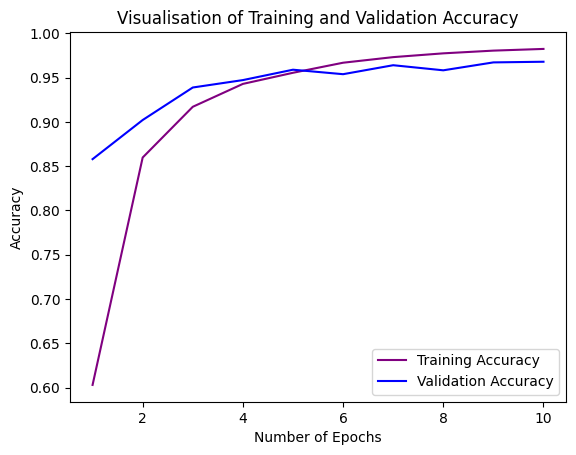

In [55]:
# Accuracy
epochs = [i for i in range(1, 11)]
plt.plot(epochs,training_history.history['accuracy'], color='purple', label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualisation of Training and Validation Accuracy")
plt.legend()
plt.show()

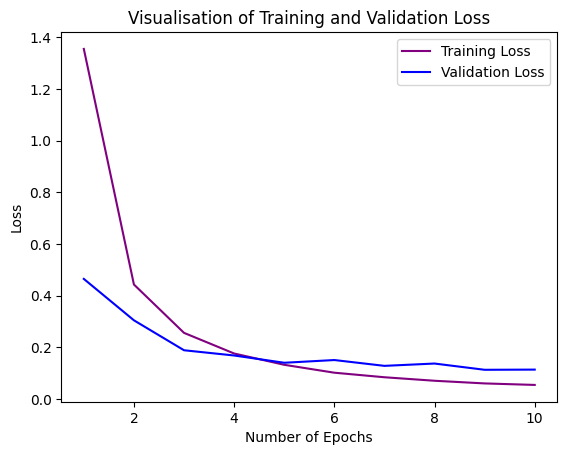

In [56]:
#Loss
epochs = [i for i in range(1, 11)]
plt.plot(epochs,training_history.history['loss'], color='purple', label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Visualisation of Training and Validation Loss")
plt.legend()
plt.show()

## Make the Prediction

In [61]:
for images, labels in test_dataset.take(1):
    print(images.shape)  # Should be (batch_size, 256, 256, 3)

(32, 256, 256, 3)


2025-03-09 17:03:54.386269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [65]:
# make the prediction on test dataset
y_pred = model.predict(test_dataset)
y_pred, y_pred.shape

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 2048, but received input with shape (32, 18432)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 256, 256, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
# get the maximus value of y_pred and return the index
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
predicted_categories

### Actual Categories

In [ ]:
actual_categories = tf.concat([y for x,y in test_dataset], axis=0)

In [ ]:
actual_categories

In [ ]:
y_actual = tf.argmax(actual_categories, axis=1)
y_actual

In [ ]:
print(classification_report(y_actual, predicted_categories, target_names=class_name))

In [ ]:
#confusion_matrix
# cm is the confusion matrix
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

cm = confusion_matrix(y_actual, predicted_categories)
cm

In [ ]:
cm.shape

## Visualise the confusion matrix

In [ ]:
#sns.heatmap(cm, annot = True, cmap="crest")

plt.figure(figsize=(18, 15))
ax = sns.heatmap(cm,  fmt=".2f", cmap="crest", linewidths=0.5, annot=True, annot_kws={'size':6})
ax.set(xlabel="Predicted Class", ylabel="Actual Class")
plt.title("Correlation Heatmap of Plant Disease Prediction CM", fontsize=16)
ax.xaxis
plt.show()